# Preprocesar y limpiar los datos :) 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
df = pd.read_csv("popularity.csv")
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id,artist_popularity,artist_followers,extraction_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX,51,147674.0,2025-05-26
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26


In [155]:
df.shape 
df.columns 
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55950 entries, 0 to 55949
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mbid               55950 non-null  object 
 1   title              55950 non-null  object 
 2   artist             55950 non-null  object 
 3   duration_ms        55565 non-null  float64
 4   genre              55950 non-null  object 
 5   year               55950 non-null  int64  
 6   spotify_id         55950 non-null  object 
 7   popularity         55950 non-null  int64  
 8   release_date       55950 non-null  object 
 9   artist_id          4500 non-null   object 
 10  artist_popularity  4353 non-null   object 
 11  artist_followers   4053 non-null   float64
 12  extraction_date    4200 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 5.5+ MB


In [156]:
df['genre'].unique()

array(['rock', 'pop', 'hip hop', 'electronic'], dtype=object)

In [157]:
df['genre'].value_counts()

genre
rock          25410
pop           19168
hip hop        7397
electronic     3975
Name: count, dtype: int64

In [158]:
df.isnull().sum().sort_values(ascending=False)

artist_followers     51897
extraction_date      51750
artist_popularity    51597
artist_id            51450
duration_ms            385
mbid                     0
title                    0
artist                   0
genre                    0
year                     0
spotify_id               0
popularity               0
release_date             0
dtype: int64

### Eliminar DUplicados

In [159]:
df = df.drop_duplicates()

### Eliminar columnas con demasiodos nulos 

In [160]:
#Eliminar las columnas con muchos nulos
df = df.drop(columns=['artist_followers', 'extraction_date', 'artist_popularity'])

In [161]:
df

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u
...,...,...,...,...,...,...,...,...,...,...
55945,0568ccbd-742b-4b61-a634-8735d2f919fb,Let Them Free,Miniman,290000.0,electronic,2016,629sev56ArrmGHed4VDAxN,7,2025-06-19,NaN
55946,a8bbb04a-59aa-42e1-ac2b-e208742001f7,N4,Lance Neptune,320301.0,electronic,2016,50VqWWJRCEXuVsqcbmRf42,1,2025-06-19,NaN
55947,82ae62af-ab2e-41be-af37-3c184d4ad13c,One,Few Nolder,440000.0,electronic,2016,02P4LWHeNnOZxFconGbDnm,19,2025-06-19,NaN
55948,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,Silent Running,Orchestral Manoeuvres in the Dark,222000.0,electronic,2016,5LmR198m65UcHCayrbYeuT,6,2025-06-19,NaN


### Eliminar nulos en columna duración con median 

In [162]:

df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())

In [163]:
df.isnull().sum().sort_values(ascending=False)

artist_id       51450
mbid                0
title               0
artist              0
duration_ms         0
genre               0
year                0
spotify_id          0
popularity          0
release_date        0
dtype: int64

In [164]:
df[df['artist_id'].isnull()][['artist', 'spotify_id']].sample(10)

,artist,spotify_id
39699,Anamanaguchi,3G9BKd2m49IE3MC6xYfuA2
29239,Unit 4+2,08VIxaRHXQoFcUvwVaegIk
10987,Bruce Springsteen,3R2q3FCnNIw2XhuEbYtYk6
48787,Nujabes,0GR0uFHhHoOA9mYToXhZ42
50645,Busta Rhymes,1NHwvBmrUje4L1dxfWnXCH
53999,Patrick Cowley,5EqCBlyZ0jOU8sTqIbObCl
24450,Napalm Death,7yRrprhkd7DQTG7iiYRP2s
50941,goje,68DmGTprYbXEAuLjjTRJtB
7335,Die Toten Hosen,3nHiwsCqcGE95vgDnXrMPP
13901,Stevie Nicks,3LXZO7PaquJWBcAgm7BnSX


### Eliminar duplicados

In [165]:
df = df.drop(columns=['artist_id'])

### Corrección de tipos de datos

In [166]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [167]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [168]:
df.dtypes

mbid                    object
title                   object
artist                  object
duration_ms            float64
genre                   object
year                     int64
spotify_id              object
popularity               int64
release_date    datetime64[ns]
dtype: object

In [169]:
df['duration_min'] = df['duration_ms'] / 60000
df = df.drop(columns=['duration_min'])


In [170]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [171]:
df.describe()

,duration_ms,year,popularity,release_date
count,5.595000e+04,55950.000000,55950.000000,55535
mean,2.393406e+05,2017.967936,25.591957,2024-04-29 10:14:39.661475072
min,3.000000e+03,2015.000000,0.000000,1962-12-10 00:00:00
25%,1.870000e+05,2016.000000,8.000000,2025-06-08 00:00:00
50%,2.229730e+05,2018.000000,22.000000,2025-06-12 00:00:00
75%,2.691745e+05,2020.000000,39.000000,2025-06-16 00:00:00
max,4.227000e+06,2022.000000,94.000000,2025-06-19 00:00:00
std,1.101093e+05,2.291421,20.935668,NaN


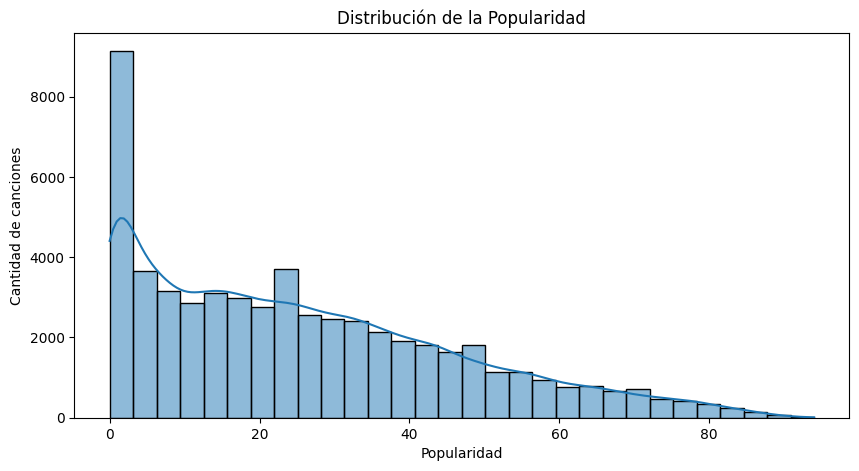

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribución de la Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de canciones")
plt.show()

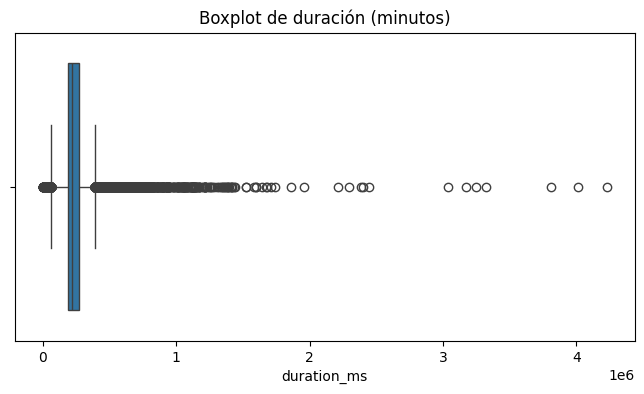

In [173]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_ms'])
plt.title("Boxplot de duración (minutos)")
plt.show()

In [174]:
df = df[df['duration_ms'] <= 900000]

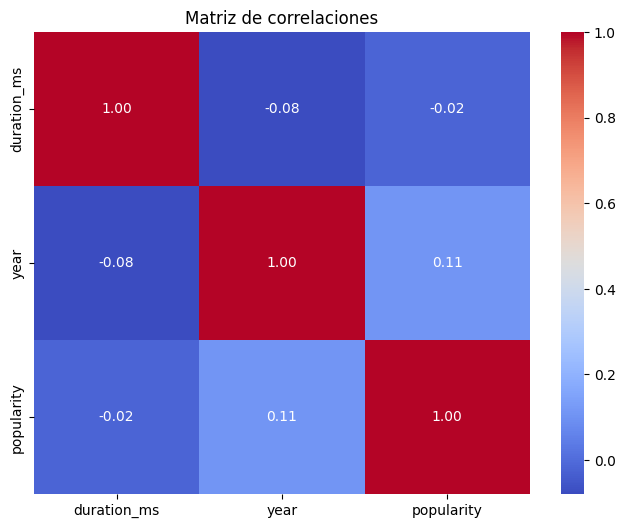

In [175]:
numeric_cols = ['duration_ms', 'year', 'popularity']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [176]:
text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [177]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [178]:
df['popularity'].describe()

count    55794.000000
mean        25.615962
std         20.941730
min          0.000000
25%          8.000000
50%         22.000000
75%         39.000000
max         94.000000
Name: popularity, dtype: float64

In [179]:
df['popularity'].value_counts().sort_index()

popularity
0     4544
1     1843
2     1405
3     1308
4     1165
      ... 
90      16
91       8
92       4
93       1
94       3
Name: count, Length: 95, dtype: int64

In [180]:
df.sort_values(by='popularity', ascending=False)[['title', 'artist', 'popularity']].head(20)

,title,artist,popularity
49414,all the stars,kendrick lamar,94
49743,all the stars,kendrick lamar,94
24004,iris,the goo goo dolls,94
15042,every breath you take,the police,93
25233,end of beginning,djo,92
48997,starboy,the weeknd,92
47988,the night we met,lord huron,92
36823,starboy,the weeknd,92
42921,as it was,harry styles,91
33904,shape of you,ed sheeran,91


In [181]:
top_by_genre = df.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,94
24004,rock,iris,the goo goo dolls,94
36823,pop,starboy,the weeknd,92
54396,electronic,latch,disclosure,85


In [182]:
 df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [183]:
columns_to_scale = ['duration_ms', 'year', 'popularity']
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [184]:
df_scaled.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.0,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.0,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.0,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.0,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.0,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27


In [185]:
top_by_genre = df_scaled.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,1.000000
24004,rock,iris,the goo goo dolls,1.000000
36823,pop,starboy,the weeknd,0.978723
54396,electronic,latch,disclosure,0.904255


In [186]:
df_scaled[columns_to_scale].describe()

,duration_ms,year,popularity
count,55794.000000,55794.000000,55794.000000
mean,0.260187,0.424132,0.272510
std,0.100321,0.327304,0.222784
min,0.000000,0.000000,0.000000
25%,0.205057,0.142857,0.085106
50%,0.245232,0.428571,0.234043
75%,0.296544,0.714286,0.414894
max,1.000000,1.000000,1.000000


In [187]:
df_features = pd.read_csv('features_full.csv')
df_features.head()

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_sample_rate,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless
0,c49650c9-bb57-4657-9061-f963f79d37ff,Мой рок-н-ролл,Би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,44100.0,flac,0,0.0,44100.0,405.386658,b822e4f7e7c07deaf63a74f41ad32a3f,-12.910631,mix,True
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,Old Coast Road,The Church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,44100.0,flac,0,0.0,44100.0,260.933319,b725b113a90ad1d25252da0186ca6d97,-12.193949,mix,True
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,Laurel Canyon,The Church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,44100.0,flac,0,0.0,44100.0,263.533325,39eb6b38229aaffd915b1171a712dc22,-12.153379,mix,True
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,Delirious,The Church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,44100.0,flac,0,0.0,44100.0,284.866669,f5ab02b8f28c14efcb58f5855ae33bd3,-12.998905,mix,True
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,Miami,The Church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,44100.0,flac,0,0.0,44100.0,518.906677,115d9f084429fb0e9ba01954d3cb3a7c,-11.940357,mix,True


In [188]:
df_features.info()
df_features.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111956 entries, 0 to 111955
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   mbid                                 111956 non-null  object 
 1   title                                111956 non-null  object 
 2   artist                               111952 non-null  object 
 3   genre                                111956 non-null  object 
 4   year                                 111956 non-null  int64  
 5   duration_ms                          111576 non-null  float64
 6   high_danceability_value              111753 non-null  object 
 7   high_danceability_probability        111753 non-null  float64
 8   high_gender_value                    111753 non-null  object 
 9   high_gender_probability              111753 non-null  float64
 10  high_genre_dortmund_value            111753 non-null  object 
 11  high_genre_do

(111956, 83)

In [189]:
# limpieza de texto 

text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df_features[col] = df_features[col].astype(str).str.strip().str.lower()

In [190]:
df_features['duration_min'] = df_features['duration_ms'] / 60000

In [191]:
df_features

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless,duration_min
0,c49650c9-bb57-4657-9061-f963f79d37ff,мой рок-н-ролл,би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,flac,0,0.0,44100.0,405.386658,b822e4f7e7c07deaf63a74f41ad32a3f,-12.910631,mix,True,6.750000
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,old coast road,the church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,flac,0,0.0,44100.0,260.933319,b725b113a90ad1d25252da0186ca6d97,-12.193949,mix,True,4.350000
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,laurel canyon,the church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,flac,0,0.0,44100.0,263.533325,39eb6b38229aaffd915b1171a712dc22,-12.153379,mix,True,4.400000
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,delirious,the church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,flac,0,0.0,44100.0,284.866669,f5ab02b8f28c14efcb58f5855ae33bd3,-12.998905,mix,True,4.750000
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,miami,the church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,flac,0,0.0,44100.0,518.906677,115d9f084429fb0e9ba01954d3cb3a7c,-11.940357,mix,True,8.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111951,77f1b426-b7ed-45fa-b260-35e7cb8543e2,no hotel,lykke li,folk,2022,146546.0,not_danceable,0.773452,female,0.917693,...,flac,0,0.0,44100.0,146.546661,ddabad7bf80b3015a613e7f9da4ff6ec,-13.966440,mix,True,2.442433
111952,742600fc-a3ba-4ada-8a80-43ef8132dcf8,you don’t go away,lykke li,folk,2022,193226.0,not_danceable,0.904865,female,0.986230,...,flac,0,0.0,44100.0,193.226669,42e5de427b7ffe35fed2b83dfeaed3da,-13.035465,mix,True,3.220433
111953,f6f86270-40e4-4a77-94b4-c2b081e13837,two ribbons,let’s eat grandma,folk,2022,325653.0,not_danceable,0.965314,female,0.740825,...,flac,0,0.0,44100.0,325.653320,14549d8359f2d980a61145811e1cc02b,-13.617031,mix,True,5.427550
111954,82ff5ae2-50c0-48f2-9f3b-d77f7ada1697,honey come home,the head and the heart,folk,2022,201000.0,not_danceable,0.776017,male,0.958390,...,mp3,252044,0.0,44100.0,200.124084,7c008915a2f87af55ce903e465ec85dd,-13.990898,mix,False,3.350000


In [192]:
df_features = df_features.drop(columns=['duration_min'])

In [193]:
df_features.isnull().sum().sort_values(ascending=False)

low_chords_key                  111956
low_tuning_diatonic_strength    111956
low_key_key                     111956
low_key_scale                   111956
low_key_strength                111956
                                 ...  
title                                0
year                                 0
genre                                0
artist                               0
audio_lossless                       0
Length: 83, dtype: int64

In [194]:
df_features

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_sample_rate,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless
0,c49650c9-bb57-4657-9061-f963f79d37ff,мой рок-н-ролл,би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,44100.0,flac,0,0.0,44100.0,405.386658,b822e4f7e7c07deaf63a74f41ad32a3f,-12.910631,mix,True
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,old coast road,the church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,44100.0,flac,0,0.0,44100.0,260.933319,b725b113a90ad1d25252da0186ca6d97,-12.193949,mix,True
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,laurel canyon,the church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,44100.0,flac,0,0.0,44100.0,263.533325,39eb6b38229aaffd915b1171a712dc22,-12.153379,mix,True
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,delirious,the church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,44100.0,flac,0,0.0,44100.0,284.866669,f5ab02b8f28c14efcb58f5855ae33bd3,-12.998905,mix,True
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,miami,the church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,44100.0,flac,0,0.0,44100.0,518.906677,115d9f084429fb0e9ba01954d3cb3a7c,-11.940357,mix,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111951,77f1b426-b7ed-45fa-b260-35e7cb8543e2,no hotel,lykke li,folk,2022,146546.0,not_danceable,0.773452,female,0.917693,...,44100.0,flac,0,0.0,44100.0,146.546661,ddabad7bf80b3015a613e7f9da4ff6ec,-13.966440,mix,True
111952,742600fc-a3ba-4ada-8a80-43ef8132dcf8,you don’t go away,lykke li,folk,2022,193226.0,not_danceable,0.904865,female,0.986230,...,44100.0,flac,0,0.0,44100.0,193.226669,42e5de427b7ffe35fed2b83dfeaed3da,-13.035465,mix,True
111953,f6f86270-40e4-4a77-94b4-c2b081e13837,two ribbons,let’s eat grandma,folk,2022,325653.0,not_danceable,0.965314,female,0.740825,...,44100.0,flac,0,0.0,44100.0,325.653320,14549d8359f2d980a61145811e1cc02b,-13.617031,mix,True
111954,82ff5ae2-50c0-48f2-9f3b-d77f7ada1697,honey come home,the head and the heart,folk,2022,201000.0,not_danceable,0.776017,male,0.958390,...,44100.0,mp3,252044,0.0,44100.0,200.124084,7c008915a2f87af55ce903e465ec85dd,-13.990898,mix,False


In [195]:
df_scaled

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27
...,...,...,...,...,...,...,...,...,...
55945,0568ccbd-742b-4b61-a634-8735d2f919fb,let them free,miniman,0.319955,electronic,0.142857,629sev56ArrmGHed4VDAxN,0.074468,2025-06-19
55946,a8bbb04a-59aa-42e1-ac2b-e208742001f7,n4,lance neptune,0.353736,electronic,0.142857,50VqWWJRCEXuVsqcbmRf42,0.010638,2025-06-19
55947,82ae62af-ab2e-41be-af37-3c184d4ad13c,one,few nolder,0.487179,electronic,0.142857,02P4LWHeNnOZxFconGbDnm,0.202128,2025-06-19
55948,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,silent running,orchestral manoeuvres in the dark,0.244147,electronic,0.142857,5LmR198m65UcHCayrbYeuT,0.063830,2025-06-19


In [196]:

def normalize_title(text):
    return text.lower().strip().replace("  ", " ")

title_to_search = "someday somewhere somehow"


result_scaled = df_scaled[df_scaled['title'].str.lower().str.strip() == normalize_title(title_to_search)]


result_features = df_features[df_features['title'].str.lower().str.strip() == normalize_title(title_to_search)]

result_scaled[['title', 'mbid']], result_features[['title', 'mbid']]

(                       title                                  mbid
 3  someday somewhere somehow  86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,
                            title                                  mbid
 56906  someday somewhere somehow  86f3c7ed-ad1b-4fc8-9679-a89fb2a50435)

In [197]:
df_merged = df_scaled.merge(df_features, on='mbid', how='inner')

In [198]:
df_merged.shape

(46459, 91)

In [199]:
df_merged.columns[df_merged.columns.str.contains('_x|_y')]

Index(['title_x', 'artist_x', 'duration_ms_x', 'genre_x', 'year_x', 'title_y',
       'artist_y', 'genre_y', 'year_y', 'duration_ms_y'],
      dtype='object')

In [200]:
df_merged = df_merged.drop(columns=[
    'title_y', 'artist_y', 'genre_y', 'year_y', 'duration_ms_y'
])

df_merged = df_merged.rename(columns={
    'title_x': 'title',
    'artist_x': 'artist',
    'genre_x': 'genre',
    'year_x': 'year',
    'duration_ms_x': 'duration_ms'
})

In [201]:
df_merged.shape

(46459, 86)

In [205]:
df_merged

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,high_danceability_value,...,audio_sample_rate,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01,danceable,...,44100.0,mp3,230321,0.0,44100.0,238.262863,490adad56dbe0bef05e0867b40cfdc3c,-12.852854,mix,False
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01,not_danceable,...,44100.0,flac,0,0.0,44100.0,172.000000,f3af995fb5b44213aeef50d6c0612fe0,-10.375830,mix,True
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27,danceable,...,44100.0,mp3,320031,0.0,44100.0,272.666138,79d4c347944baf7c9f7ac96d2851b973,-11.543839,mix,False
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27,danceable,...,44100.0,flac,0,0.0,44100.0,399.466675,fc4a3dcfb2fc25f7b265b5e7493a7e47,-13.646166,mix,True
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27,danceable,...,44100.0,flac,0,0.0,44100.0,432.000000,bc9cc96cb18c3028a5fd0119dbe31851,-12.346411,mix,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46454,0568ccbd-742b-4b61-a634-8735d2f919fb,let them free,miniman,0.319955,electronic,0.142857,629sev56ArrmGHed4VDAxN,0.074468,2025-06-19,danceable,...,44100.0,mp3,160014,0.0,44100.0,290.037537,95cbb2816d944a0021c5edb7ae4f632c,-9.368219,mix,False
46455,a8bbb04a-59aa-42e1-ac2b-e208742001f7,n4,lance neptune,0.353736,electronic,0.142857,50VqWWJRCEXuVsqcbmRf42,0.010638,2025-06-19,not_danceable,...,44100.0,flac,0,0.0,44100.0,320.300903,f8e08cab9f48e843a0bfa5b5b2366721,-8.530348,mix,True
46456,82ae62af-ab2e-41be-af37-3c184d4ad13c,one,few nolder,0.487179,electronic,0.142857,02P4LWHeNnOZxFconGbDnm,0.202128,2025-06-19,danceable,...,44100.0,flac,0,0.0,44100.0,440.655792,1a969e08a00104fa7202d8dfcc8309cc,-12.986111,mix,True
46457,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,silent running,orchestral manoeuvres in the dark,0.244147,electronic,0.142857,5LmR198m65UcHCayrbYeuT,0.063830,2025-06-19,danceable,...,44100.0,flac,0,0.0,44100.0,220.679993,8332069bde1bfc47e1bc037217340936,-7.697742,mix,True


In [209]:
df_merged['danceability_encoded'] = df_merged['high_danceability_value'].map({
    'danceable': 1,
    'not_danceable': 0
})

In [211]:
df_merged.drop(columns=['high_danceability_value'], inplace=True)

In [212]:
df_merged

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,high_danceability_probability,...,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless,danceability_encoded
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01,0.993112,...,mp3,230321,0.0,44100.0,238.262863,490adad56dbe0bef05e0867b40cfdc3c,-12.852854,mix,False,1.0
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01,0.525476,...,flac,0,0.0,44100.0,172.000000,f3af995fb5b44213aeef50d6c0612fe0,-10.375830,mix,True,0.0
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27,0.848704,...,mp3,320031,0.0,44100.0,272.666138,79d4c347944baf7c9f7ac96d2851b973,-11.543839,mix,False,1.0
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27,0.808692,...,flac,0,0.0,44100.0,399.466675,fc4a3dcfb2fc25f7b265b5e7493a7e47,-13.646166,mix,True,1.0
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27,0.895377,...,flac,0,0.0,44100.0,432.000000,bc9cc96cb18c3028a5fd0119dbe31851,-12.346411,mix,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46454,0568ccbd-742b-4b61-a634-8735d2f919fb,let them free,miniman,0.319955,electronic,0.142857,629sev56ArrmGHed4VDAxN,0.074468,2025-06-19,1.000000,...,mp3,160014,0.0,44100.0,290.037537,95cbb2816d944a0021c5edb7ae4f632c,-9.368219,mix,False,1.0
46455,a8bbb04a-59aa-42e1-ac2b-e208742001f7,n4,lance neptune,0.353736,electronic,0.142857,50VqWWJRCEXuVsqcbmRf42,0.010638,2025-06-19,1.000000,...,flac,0,0.0,44100.0,320.300903,f8e08cab9f48e843a0bfa5b5b2366721,-8.530348,mix,True,0.0
46456,82ae62af-ab2e-41be-af37-3c184d4ad13c,one,few nolder,0.487179,electronic,0.142857,02P4LWHeNnOZxFconGbDnm,0.202128,2025-06-19,0.999996,...,flac,0,0.0,44100.0,440.655792,1a969e08a00104fa7202d8dfcc8309cc,-12.986111,mix,True,1.0
46457,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,silent running,orchestral manoeuvres in the dark,0.244147,electronic,0.142857,5LmR198m65UcHCayrbYeuT,0.063830,2025-06-19,0.926764,...,flac,0,0.0,44100.0,220.679993,8332069bde1bfc47e1bc037217340936,-7.697742,mix,True,1.0


In [213]:
df_merged.select_dtypes(include='object').columns.tolist()

['mbid',
 'title',
 'artist',
 'genre',
 'spotify_id',
 'high_gender_value',
 'high_genre_dortmund_value',
 'high_genre_electronic_value',
 'high_genre_rosamerica_value',
 'high_genre_tzanetakis_value',
 'high_ismir04_rhythm_value',
 'high_mood_acoustic_value',
 'high_mood_aggressive_value',
 'high_mood_electronic_value',
 'high_mood_happy_value',
 'high_mood_party_value',
 'high_mood_relaxed_value',
 'high_mood_sad_value',
 'high_moods_mirex_value',
 'high_timbre_value',
 'high_tonal_atonal_value',
 'high_voice_instrumental_value',
 'audio_codec',
 'audio_md5_encoded',
 'audio_downmix']

In [214]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_merged.copy()

# One-hot encoding para 'genre' 
df_encoded = pd.get_dummies(df_encoded, columns=['genre'], prefix='genre')

# LabelEncoder para columnas categóricas binarias o con pocos valores
label_cols = [
    'high_gender_value',
    'high_genre_dortmund_value',
    'high_genre_electronic_value',
    'high_genre_rosamerica_value',
    'high_genre_tzanetakis_value',
    'high_ismir04_rhythm_value',
    'high_mood_acoustic_value',
    'high_mood_aggressive_value',
    'high_mood_electronic_value',
    'high_mood_happy_value',
    'high_mood_party_value',
    'high_mood_relaxed_value',
    'high_mood_sad_value',
    'high_moods_mirex_value',
    'high_timbre_value',
    'high_tonal_atonal_value',
    'high_voice_instrumental_value',
    'audio_codec',
    'audio_downmix'
]

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # por si hay NaNs o tipos mixtos

# Eliminar columnas no necesarias 
df_encoded.drop(['spotify_id', 'audio_md5_encoded'], axis=1, inplace=True)

In [223]:
df_encoded

,mbid,title,artist,duration_ms,year,popularity,release_date,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_analysis_sample_rate,audio_length,audio_replay_gain,audio_downmix,audio_lossless,danceability_encoded,genre_electronic,genre_hip hop,genre_pop,genre_rock
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,0.000000,0.021277,2006-01-01,0.993112,1,0.846076,...,44100.0,238.262863,-12.852854,1,False,1.0,False,False,False,True
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,0.000000,0.159574,1990-01-01,0.525476,1,1.000000,...,44100.0,172.000000,-10.375830,1,True,0.0,False,False,False,True
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,0.000000,0.085106,2020-11-27,0.848704,0,0.903481,...,44100.0,272.666138,-11.543839,1,False,1.0,False,False,False,True
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,0.000000,0.053191,2012-07-27,0.808692,1,0.539266,...,44100.0,399.466675,-13.646166,1,True,1.0,False,False,False,True
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,0.000000,0.127660,2012-07-27,0.895377,1,0.825991,...,44100.0,432.000000,-12.346411,1,True,1.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46454,0568ccbd-742b-4b61-a634-8735d2f919fb,let them free,miniman,0.319955,0.142857,0.074468,2025-06-19,1.000000,1,0.560309,...,44100.0,290.037537,-9.368219,1,False,1.0,True,False,False,False
46455,a8bbb04a-59aa-42e1-ac2b-e208742001f7,n4,lance neptune,0.353736,0.142857,0.010638,2025-06-19,1.000000,1,0.906318,...,44100.0,320.300903,-8.530348,1,True,0.0,True,False,False,False
46456,82ae62af-ab2e-41be-af37-3c184d4ad13c,one,few nolder,0.487179,0.142857,0.202128,2025-06-19,0.999996,0,0.769992,...,44100.0,440.655792,-12.986111,1,True,1.0,True,False,False,False
46457,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,silent running,orchestral manoeuvres in the dark,0.244147,0.142857,0.063830,2025-06-19,0.926764,0,0.813640,...,44100.0,220.679993,-7.697742,1,True,1.0,True,False,False,False


# Borrar provisionalmente NaN

In [224]:
df_clean = df_encoded.dropna()
df_clean = df_encoded.fillna(df_encoded.mean(numeric_only=True))

In [227]:
empty_cols = df.columns[df.isna().all()]
print(empty_cols)

Index([], dtype='object')


In [232]:
print(df_encoded.isna().sum().sort_values(ascending=False).head(10))

low_key_key                            46459
low_zero_crossing_rate                 46459
low_tuning_diatonic_strength           46459
low_beats_count                        46459
low_onset_rate                         46459
low_bpm                                46459
audio_sample_rate                       2218
release_date                             385
high_mood_acoustic_probability           113
high_voice_instrumental_probability      113
dtype: int64


In [233]:
cols_to_drop = [
    'low_key_scale',
    'low_danceability',
    'low_key_strength',
    'low_chords_scale',
    'low_chords_changes_rate',
    'low_chords_key',
    'low_chords_number_rate',
    'low_tuning_nontempered_energy_ratio',
    'low_tuning_frequency',
    'low_tuning_equal_tempered_deviation'
]

df_clean.drop(columns=cols_to_drop, inplace=True)

In [237]:
df_encoded[numeric_cols].isnull().sum().sort_values(ascending=False).head(10)

low_onset_rate                      46459
low_key_key                         46459
low_bpm                             46459
low_tuning_diatonic_strength        46459
low_beats_count                     46459
low_zero_crossing_rate              46459
audio_sample_rate                    2218
high_mood_electronic_probability      113
high_mood_happy_probability           113
high_mood_acoustic_probability        113
dtype: int64

In [238]:
cols_all_nan = [
    "low_onset_rate", "low_key_key", "low_bpm", 
    "low_tuning_diatonic_strength", "low_beats_count", 
    "low_zero_crossing_rate"
]
df_encoded.drop(columns=cols_all_nan, inplace=True)

In [241]:
from sklearn.preprocessing import StandardScaler

# Selecciona sólo columnas numéricas y booleanas
numeric_cols = df_encoded.select_dtypes(include=['number', 'bool']).columns

# Escala esas columnas
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [243]:
df_encoded_scaled.info 


<bound method DataFrame.info of                                        mbid  \
0      50971422-fed2-47ad-9a6f-eacf64ebb965   
1      76c66068-5d89-45c2-92be-22f7562dfa3c   
2      e9da3272-429d-41a2-b84d-b0c09b99a286   
3      86f3c7ed-ad1b-4fc8-9679-a89fb2a50435   
4      9c45c16f-addc-4a53-ad2b-f5481556bfcb   
...                                     ...   
46454  0568ccbd-742b-4b61-a634-8735d2f919fb   
46455  a8bbb04a-59aa-42e1-ac2b-e208742001f7   
46456  82ae62af-ab2e-41be-af37-3c184d4ad13c   
46457  26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d   
46458  88a462b6-630c-4c1a-97ed-c11f8aee04dd   

                                        title  \
0      shades of green (utah saints 7″ remix)   
1                                mr. pleasant   
2                                         118   
3                   someday somewhere somehow   
4                                folie á deux   
...                                       ...   
46454                           let them free   
46455      

In [244]:
y = df_encoded['popularity']
X = df_encoded.drop(columns=['popularity', 'mbid', 'title', 'artist', 'release_date'])

In [245]:
correlation_matrix = df_encoded.corr(numeric_only=True)
correlation_matrix.head()

,duration_ms,year,popularity,high_danceability_probability,high_gender_value,high_gender_probability,high_genre_dortmund_value,high_genre_dortmund_probability,high_genre_electronic_value,high_genre_electronic_probability,...,audio_analysis_sample_rate,audio_length,audio_replay_gain,audio_downmix,audio_lossless,danceability_encoded,genre_electronic,genre_hip hop,genre_pop,genre_rock
duration_ms,1.000000,-0.042210,-0.047447,-0.025358,-0.019675,-0.052869,-0.204515,0.502906,0.194646,-0.037296,...,NaN,0.984206,-0.024526,-0.001005,0.056820,-0.003814,0.158966,-0.091197,-0.108793,0.075289
year,-0.042210,1.000000,0.183424,-0.017033,-0.001365,-0.014082,0.035918,-0.044857,-0.010903,0.008891,...,NaN,-0.041814,0.010079,0.005633,0.013678,-0.102207,-0.318350,-0.160403,0.015048,0.264094
popularity,-0.047447,0.183424,1.000000,0.061274,-0.064643,0.073618,-0.038395,0.076227,0.007869,-0.105948,...,NaN,-0.047216,-0.114743,0.025132,0.040678,0.106219,-0.200021,0.127858,0.131435,-0.098130
high_danceability_probability,-0.025358,-0.017033,0.061274,1.000000,-0.187120,-0.132479,-0.029160,0.172667,0.193768,0.018083,...,NaN,-0.025283,0.020753,0.003529,0.002065,0.067749,0.118191,0.166860,0.018370,-0.190604
high_gender_value,-0.019675,-0.001365,-0.064643,-0.187120,1.000000,0.074331,0.080471,-0.167876,0.041865,0.004773,...,NaN,-0.019617,-0.042878,0.073650,-0.028214,-0.040321,-0.105203,-0.043904,-0.101567,0.181832


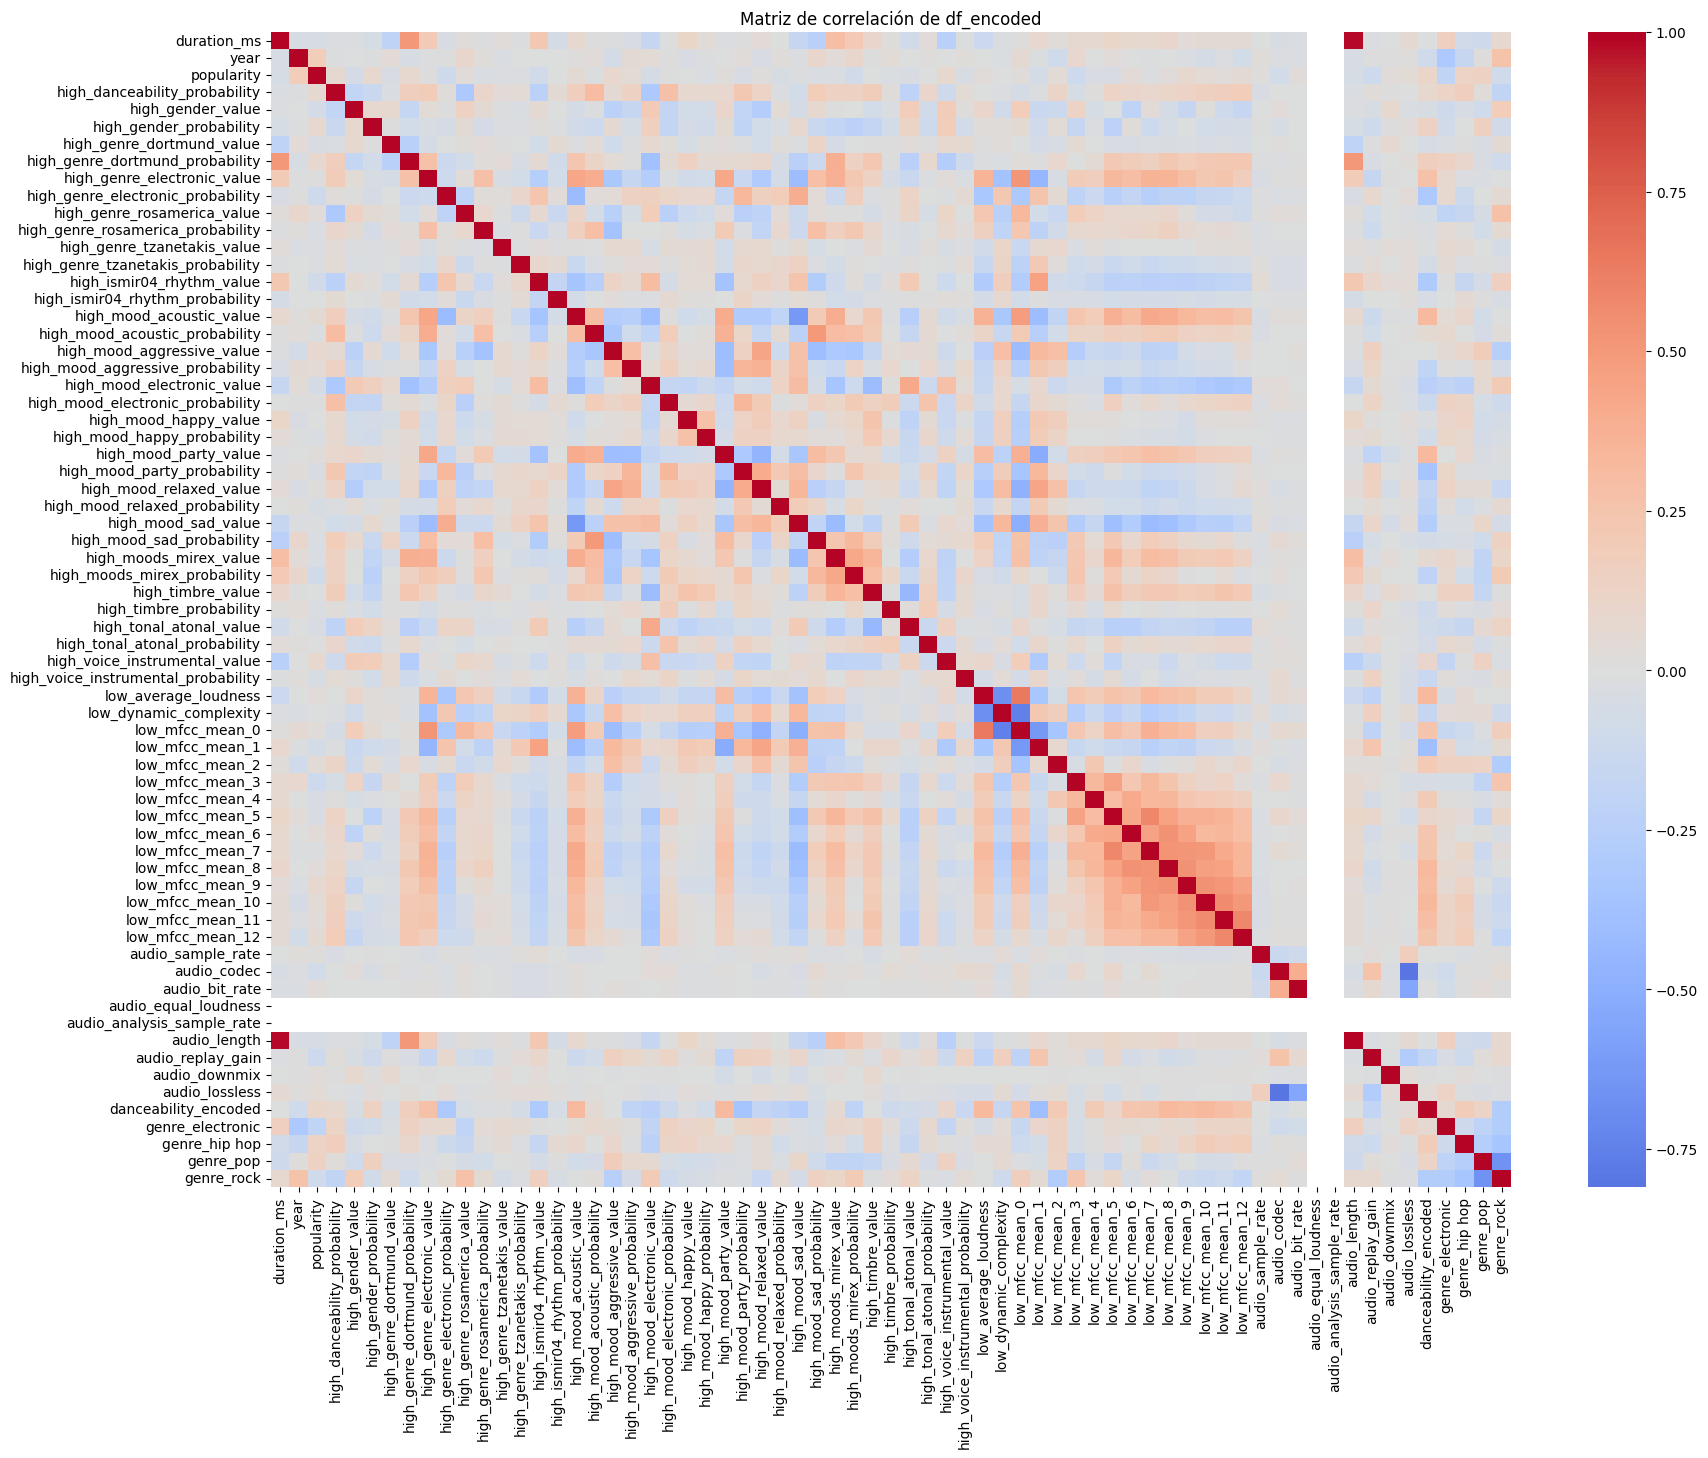

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlación de df_encoded")
plt.show()

In [247]:
pop_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print(pop_corr)

popularity                    1.000000
year                          0.183424
genre_pop                     0.131435
genre_hip hop                 0.127858
danceability_encoded          0.106219
                                ...   
audio_replay_gain            -0.114743
low_mfcc_mean_3              -0.115108
genre_electronic             -0.200021
audio_equal_loudness               NaN
audio_analysis_sample_rate         NaN
Name: popularity, Length: 67, dtype: float64


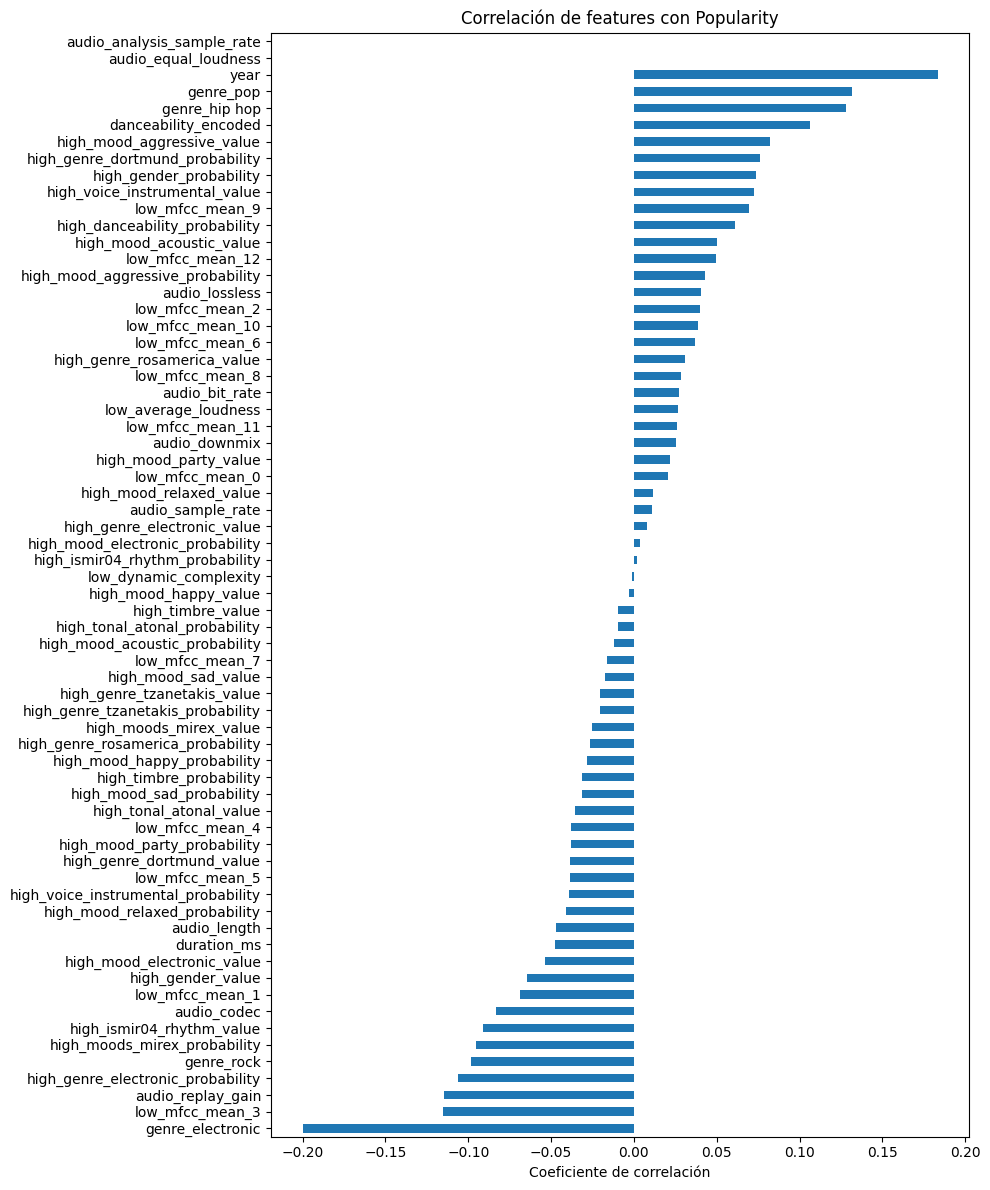

In [248]:
plt.figure(figsize=(10, 12))
pop_corr.drop('popularity').sort_values().plot(kind='barh')
plt.title("Correlación de features con Popularity")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()